# Hierarchical Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
Targ='tds'

In [3]:
dataset = pd.read_csv('tds.csv')
dataset.head()

,t,sta,ec_mtz,ec_sac,ec_sjr,ec_east,ec_ag,ec,tds,vol
0,3/20/1990,Banks PP,193,152,10.48,6,79.37,445.0,250.0,440.85
1,4/18/1990,Banks PP,520,155,7.75,4,59.34,706.0,375.0,746.09
2,5/15/1990,Banks PP,381,132,31.47,3,70.67,698.0,385.0,618.14
3,6/19/1990,Banks PP,254,126,27.14,6,108.10,615.0,350.0,521.24
4,7/18/1990,Banks PP,242,150,6.70,2,99.73,385.0,218.0,500.43


In [4]:
dataset = pd.read_csv("tds.csv")
x = dataset[['ec_mtz','ec_sac','ec_sjr','ec_east','ec_ag','ec',Targ]]
#x = dataset[['ec',Targ]]

x = pd.DataFrame(x)

In [5]:
x.head()

,ec_mtz,ec_sac,ec_sjr,ec_east,ec_ag,ec,tds
0,193,152,10.48,6,79.37,445.0,250.0
1,520,155,7.75,4,59.34,706.0,375.0
2,381,132,31.47,3,70.67,698.0,385.0
3,254,126,27.14,6,108.10,615.0,350.0
4,242,150,6.70,2,99.73,385.0,218.0


## Using the dendrogram to find the optimal number of clusters

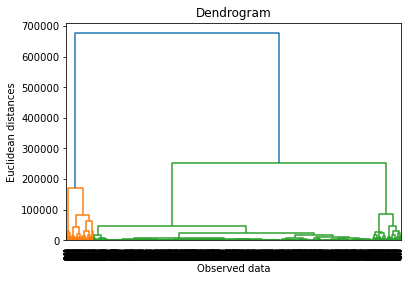

In [7]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Observed data')
plt.ylabel('Euclidean distances')
plt.show()

## Training the Hierarchical Clustering model on the dataset

In [11]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)
y_hc = pd.DataFrame(y_hc)
dataset['hc']=y_hc

## Results

In [12]:
dataset.head()

,t,sta,ec_mtz,ec_sac,ec_sjr,ec_east,ec_ag,ec,tds,vol,hc
0,3/20/1990,Banks PP,193,152,10.48,6,79.37,445.0,250.0,440.85,2
1,4/18/1990,Banks PP,520,155,7.75,4,59.34,706.0,375.0,746.09,2
2,5/15/1990,Banks PP,381,132,31.47,3,70.67,698.0,385.0,618.14,2
3,6/19/1990,Banks PP,254,126,27.14,6,108.10,615.0,350.0,521.24,2
4,7/18/1990,Banks PP,242,150,6.70,2,99.73,385.0,218.0,500.43,2


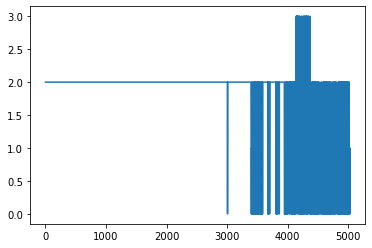

In [13]:
plt.plot(dataset['hc'])

In [15]:
station = dataset['sta'].unique()
for j in station:
    print((j),dataset[dataset['sta']== (j)]['hc'].unique())

Banks PP [2]
BANKS [2]
CLIFTON [2]
Clifton Court Intake [2]
C9 [2]
WSTCANCLIFT [2]
DMC [2]
OLDR-DMC-CLIFT [2]
OLDRIVDMC [2]
OLDRIVBACISL [2]
CONCOSPP1 [2]
STATION09 [2]
GRANTOLD [2]
SANTAFEBACON [2]
MIDDLER [2]
NVICWOOD [2]
MRIVBACON [2]
SANDMOUND [2]
ROCKSL [2]
NORTHCAN [2]
DELTACRCHAN [2]
North Bay Aqueduct [2]
STATION04B [2]
FALSETIP-WEBB [2]
MD10 [2]
MD10A [2]
MD7A [2]
P10A [2]
P12 [2]
P12A [2]
P8 [2]
D19 [2]
D26 [2]
D28A [2]
C10 [2 0]
C10A [2]
C3 [2]
C7 [2]
D10 [1 0 2]
D11 [0 2]
D12 [0 2]
D14A [2]
D15 [2 0]
D16 [2]
D22 [2 0]
D24 [2]
D4 [0 1 2]
D6 [3 1 0 2]
D7 [1 3 0 2]
D8 [1 0 2]
D9 [1 0 2]
SJRJERSEY [2]
MALLARDIS [0 1 2]


In [16]:
for j in station:
    for i in range (0,4):
        print((j),'Zone',(i+1),'=', dataset[(dataset.sta== j) & (dataset.hc==i)].tds.count())

Banks PP Zone 1 = 0
Banks PP Zone 2 = 0
Banks PP Zone 3 = 222
Banks PP Zone 4 = 0
BANKS Zone 1 = 0
BANKS Zone 2 = 0
BANKS Zone 3 = 224
BANKS Zone 4 = 0
CLIFTON Zone 1 = 0
CLIFTON Zone 2 = 0
CLIFTON Zone 3 = 132
CLIFTON Zone 4 = 0
Clifton Court Intake Zone 1 = 0
Clifton Court Intake Zone 2 = 0
Clifton Court Intake Zone 3 = 114
Clifton Court Intake Zone 4 = 0
C9 Zone 1 = 0
C9 Zone 2 = 0
C9 Zone 3 = 68
C9 Zone 4 = 0
WSTCANCLIFT Zone 1 = 0
WSTCANCLIFT Zone 2 = 0
WSTCANCLIFT Zone 3 = 20
WSTCANCLIFT Zone 4 = 0
DMC Zone 1 = 0
DMC Zone 2 = 0
DMC Zone 3 = 104
DMC Zone 4 = 0
OLDR-DMC-CLIFT Zone 1 = 0
OLDR-DMC-CLIFT Zone 2 = 0
OLDR-DMC-CLIFT Zone 3 = 15
OLDR-DMC-CLIFT Zone 4 = 0
OLDRIVDMC Zone 1 = 0
OLDRIVDMC Zone 2 = 0
OLDRIVDMC Zone 3 = 18
OLDRIVDMC Zone 4 = 0
OLDRIVBACISL Zone 1 = 0
OLDRIVBACISL Zone 2 = 0
OLDRIVBACISL Zone 3 = 191
OLDRIVBACISL Zone 4 = 0
CONCOSPP1 Zone 1 = 0
CONCOSPP1 Zone 2 = 0
CONCOSPP1 Zone 3 = 192
CONCOSPP1 Zone 4 = 0
STATION09 Zone 1 = 0
STATION09 Zone 2 = 0
STATION09 Zo

In [17]:
for i in range(0,4):
    print('Zone =' ,(i+1), '=', dataset[dataset['hc']== i]['sta'].unique())

Zone = 1 = ['C10' 'D10' 'D11' 'D12' 'D15' 'D22' 'D4' 'D6' 'D7' 'D8' 'D9' 'MALLARDIS']
Zone = 2 = ['D10' 'D4' 'D6' 'D7' 'D8' 'D9' 'MALLARDIS']
Zone = 3 = ['Banks PP' 'BANKS' 'CLIFTON' 'Clifton Court Intake' 'C9' 'WSTCANCLIFT'
 'DMC' 'OLDR-DMC-CLIFT' 'OLDRIVDMC' 'OLDRIVBACISL' 'CONCOSPP1' 'STATION09'
 'GRANTOLD' 'SANTAFEBACON' 'MIDDLER' 'NVICWOOD' 'MRIVBACON' 'SANDMOUND'
 'ROCKSL' 'NORTHCAN' 'DELTACRCHAN' 'North Bay Aqueduct' 'STATION04B'
 'FALSETIP-WEBB' 'MD10' 'MD10A' 'MD7A' 'P10A' 'P12' 'P12A' 'P8' 'D19'
 'D26' 'D28A' 'C10' 'C10A' 'C3' 'C7' 'D10' 'D11' 'D12' 'D14A' 'D15' 'D16'
 'D22' 'D24' 'D4' 'D6' 'D7' 'D8' 'D9' 'SJRJERSEY' 'MALLARDIS']
Zone = 4 = ['D6' 'D7']


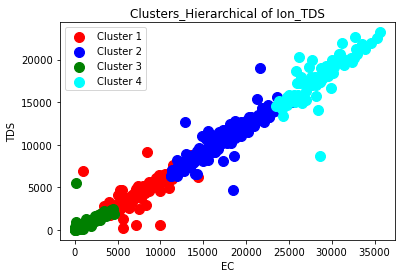

In [23]:
plt.scatter( dataset[dataset['hc']== 0].ec, dataset[dataset['hc']== 0].tds, s = 100, c = 'red', label = 'Cluster 1')
plt.scatter( dataset[dataset['hc']== 1].ec, dataset[dataset['hc']== 1].tds, s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter( dataset[dataset['hc']== 2].ec, dataset[dataset['hc']== 2].tds, s = 100, c = 'green', label = 'Cluster 3')
plt.scatter( dataset[dataset['hc']== 3].ec, dataset[dataset['hc']== 3].tds, s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters_Hierarchical of Ion_TDS')
plt.xlabel('EC')
plt.ylabel('TDS')
plt.legend()
plt.show()